# Taller 1 Geometria Computacional y Diferencial

## Daniel Leyva Castro

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from random import randint, uniform
import pprint

### Punto 1

El siguiente código implementa las siguientes funciones:
- `crossProduct`: Calcula el producto cruz entre dos vectores.
- `cross`: Calcula si dos segmentos se cruzan y en caso de que se crucen, calcula el punto de intersección o el intervalo de intersección.

Adicionalmente, se implementó la función `plotter` para graficar los segmentos y el punto de intersección o el intervalo de intersección.

In [3]:
def crossProduct(p0, p1, p2):
    # p0, p1, p2 Points on the plane
    # return the cross product of the vectors p0p1 and p0p2
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    return (x1-x0)*(y2-y0) - (x2-x0)*(y1-y0)

def cross(p0,p1,p2,p3):
    # Function that checks if two segments cross each other
    # p0, p1, p2, p3 are the points of the segments
    # p0 and p1 are the points of the first segment
    # p2 and p3 are the points of the second segment
    # return: (True, intersection point) if the segments cross each other in a single point
    # return: (True, interval) if the segments cross each other in an interval
    # return: (False, ()) if the segments do not cross each other

    if p0 > p3:
        p0, p2 = p2, p0
        p1, p3 = p3, p1

    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3

    cp1 = crossProduct(p2,p3,p0)
    cp2 = crossProduct(p2,p3,p1)
    cp3 = crossProduct(p0,p1,p2)
    cp4 = crossProduct(p0,p1,p3)
    crossed = False

    # Conditions to check if the segments cross each other
    conditions = [
        cp1*cp2 < 0 and cp3*cp4 <0,
        cp1 == 0 and min(x2,x3) <= x0 <= max(x2,x3) and min(y2,y3) <= y0 <= max(y2,y3),
        cp2 == 0 and min(x2,x3) <= x1 <= max(x2,x3) and min(y2,y3) <= y1 <= max(y2,y3),
        cp3 == 0 and min(x0,x1) <= x2 <= max(x0,x1) and min(y0,y1) <= y2 <= max(y0,y1),
        cp4 == 0 and min(x0,x1) <= x3 <= max(x0,x1) and min(y0,y1) <= y3 <= max(y0,y1)
    ]

    # Conditions to check if the segments cross each other in an interval
    cossedInterval = [
        cp1 * cp2 == 0, cp3 * cp4 == 0,
        min(x0, x1) <= max(x2, x3),
        min(x2, x3) <= max(x0, x1),
        min(y0, y1) <= max(y2, y3),
        min(y2, y3) <= max(y0, y1)
    ]

    if any(conditions):
        crossed = True
        if all(cossedInterval):
            if (max(x2, x3) <= max(x0, x1) or (max(y2, y3) <= max(y0, y1))) and all([cp1 * cp2 == 0, cp3 * cp4 == 0]):
                if min(p2, p3) == max(p0,p1):
                    return crossed, max(p0,p1)
                return crossed, (p2,p3)
            
            if min(p1,p2) == max(p1,p2):
                return crossed, p1

            return crossed, (min(p1,p2), max(p1,p2))
        
             

        # get the intersection point using matrix
        A = np.matrix([
            [x2-x3, x1-x0],
            [y2-y3, y1-y0]
        ])


        # get the inverse of the matrix
        Ainv = np.linalg.inv(A)

        r = Ainv*np.matrix([[x1-x3],[y1-y3]])

        pcx = r[1][0] * p0[0] + (1 - r[1][0]) * p1[0]
        pcy = r[1][0] * p0[1] + (1 - r[1][0]) * p1[1]

        return crossed, (float(pcx), float(pcy))
    else:
        return crossed, ()

def plotter(cross, s1, s2):
    # Plotting the segments
    plt.plot([s1[0][0], s1[1][0]], [s1[0][1], s1[1][1]], 'o-')
    plt.plot([s2[0][0], s2[1][0]], [s2[0][1], s2[1][1]], 'o-')

    if not cross[0]:
        plt.title('Points do not cross each other')
    else:
        if type(cross[1][0]) == tuple:
            plt.title('Points cross each other in an interval')
            plt.plot([cross[1][0][0], cross[1][1][0]], [cross[1][0][1], cross[1][1][1]], 'o-')

        else:
            plt.title('Points cross each other in a single point')
            plt.plot(cross[1][0], cross[1][1], 'ro')


    # legends
    plt.legend(['Segment 1', 'Segment 2', f'Intersection:\n {cross[1]}'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()

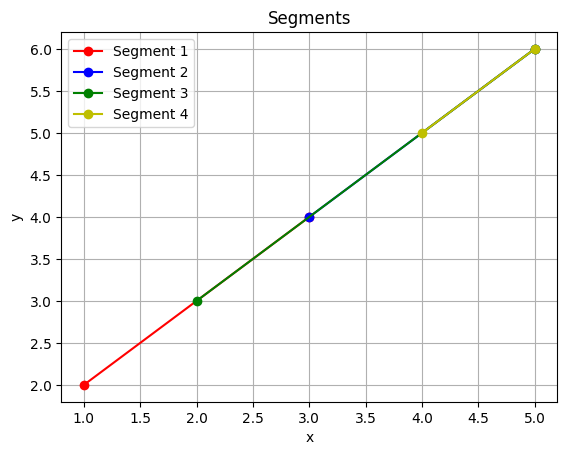

In [4]:
# Defining segments given
s1 = [(1,2),(3,4)]
s2 = [(3,4),(5,6)]
s3 = [(2,3),(5,6)]
s4 = [(4,5),(5,6)]

# Plotting the segments
plt.plot([s1[0][0], s1[1][0]], [s1[0][1], s1[1][1]], 'ro-', label='Segment 1')
plt.plot([s2[0][0], s2[1][0]], [s2[0][1], s2[1][1]], 'bo-', label='Segment 2')
plt.plot([s3[0][0], s3[1][0]], [s3[0][1], s3[1][1]], 'go-', label='Segment 3')
plt.plot([s4[0][0], s4[1][0]], [s4[0][1], s4[1][1]], 'yo-', label='Segment 4')
plt.title('Segments')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Ahora se comprobarán las intersecciones:
- Segmento 1 con segmento 2
- Segmento 1 con segmento 3
- Segmento 1 con segmento 4

## Segmento 1 con segmento 2: Interseccion en un punto.

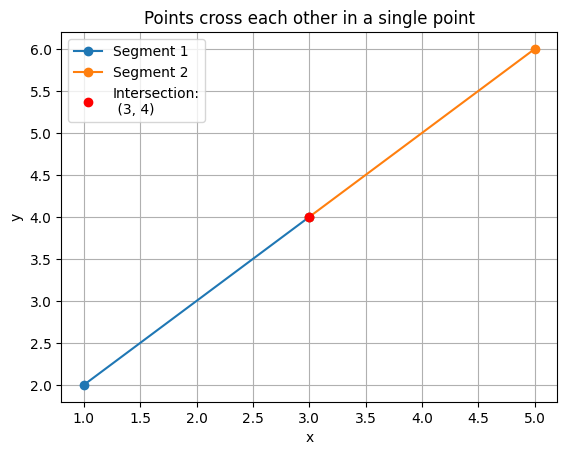

In [5]:
# Case 1: S1 - S2
plotter(cross(s1[0],s1[1],s2[0],s2[1]), s1, s2)

## Segmento 1 con segmento 3: Interseccion en un intervalo.

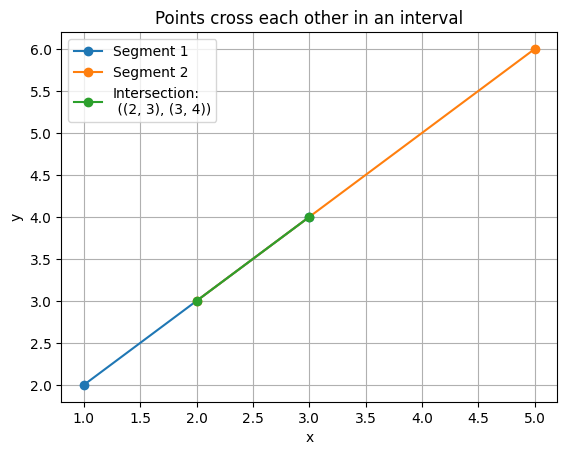

In [6]:
# Case 2: S1 - S3
plotter(cross(s1[0],s1[1],s3[0],s3[1]), s1, s3)

## Segmento 1 con segmento 4: Intersección en un punto.

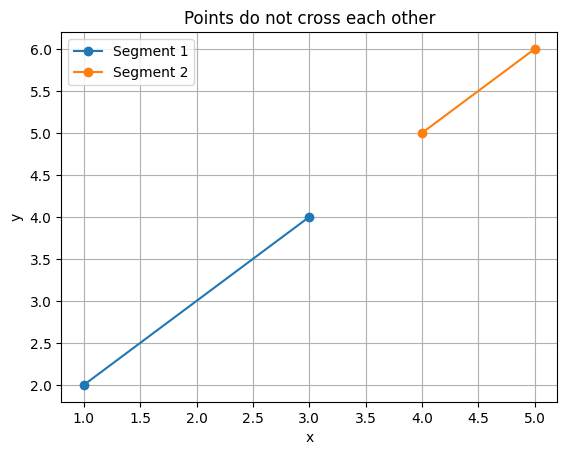

In [7]:
# Case 3: S1 - S4
plotter(cross(s1[0],s1[1],s4[0],s4[1]), s1, s4)

### Punto 2

#### a) Algoritmo "Divide and Conquer" para encontrar la envolvente convexa de un conjunto de puntos.

Inicialmente, se implementa el algoritmo de Graham para calcular la envolvente convexa. Esto se utiliza para los subcasos del algoritmo "Divide and Conquer".

In [8]:
def direction(p0, p1, p2):
    # p0, p1, p2 are points
    # return: -1 if counter-clockwise, 1 if clockwise, 0 if colinear
    cp = crossProduct(p0=p0, p1=p1, p2=p2)
    # print(f"cp: {cp}")
    if cp > 0:
        return -1  # Left
    elif cp < 0:
        return 1  # Right
    elif cp == 0:
        return 0  # Colinear


def slope(p0,p1):
    # p0, p1 are points
    # return: slope of the line
    x0, y0 = p0
    x1, y1 = p1
    try:
        return (y1-y0)/(x1-x0)
    except:
        return float("inf")

def distance(p0, p1):
    # p0, p1 are points
    # return: distance between p0 and p1 (euclidean)
    x0, y0 = p0
    x1, y1 = p1
    return math.sqrt((x1-x0)**2 + (y1-y0)**2)

def getMin(points : list) -> tuple:
    # points is a list of points
    # return: the point with the minimum sorted by the rule
    xs = [i[0] for i in points]
    ys = [i[1] for i in points]

    temp = min(xs)
    xminindex = [i for i, j in enumerate(xs) if j == temp]

    if len(xminindex) != 1:
        ymin = min([ys[i] for i in xminindex])
        tmin = points[ys.index(ymin)]
    else:
        tmin = points[xminindex[0]]
    return tmin

def clearPoints(points: list, p0):
    # create a list of the points without p0 sorted by slope
    # points is a list of points
    # p0 is a point
    # return: a list of points sorted by slope
    points.remove(p0)
    # get the poins with the same slopes
    a = {}
    for i in points:

        if slope(p0, i) not in a.keys():
            a[slope(p0, i)] = [i]
        else:
            a[slope(p0, i)].append(i)

    for i in a:
        a[i].sort(key=lambda x: distance(p0, x))

    final = [a[i][-1] for i in a]
    final.sort(key = lambda x : slope(p0, x))
    return final

def graham(points):
    # Graham algorithm
    # points is a list of points
    # return: a list of points that form the convex hull
    S = []
    p0 = getMin(points)
    S.append(p0)
    heap = clearPoints(points, p0)
    S.append(heap[0])
    heap.pop(0)
    S.append(heap[0])
    heap.pop(0)
    # print(S)
    for i in heap:
        S.append(i)
        while direction(S[-3], S[-2], S[-1]) != -1:
            S.pop(-2)
    S.append(p0)
    return S

Ahora se implementa el algoritmo "Divide and Conquer" para encontrar la envolvente convexa de un conjunto de puntos.

In [9]:
def findTangent(hull1, hull2, h1r, h2l, tail):
    # hull1, hull2 are the convex hulls
    # h1r, h2l are the rightmost and leftmost points of hull1 and hull2 respectively
    # tail: upper tangent if 1, lower tangent if 0
    # return: the tangent
    h1r = hull1.index(h1r)
    h2l = hull2.index(h2l)
    if tail == 0:
        while 1:
            while direction(hull1[h1r], hull2[h2l], hull2[(h2l + 1) % len(hull2)]) >= 0:
                h2l = (h2l + 1) % len(hull2)
            if direction(hull2[h2l], hull1[h1r], hull1[(len(hull1) + h1r - 1) % len(hull1)]) <= 0:
                while direction(hull2[h2l], hull1[h1r], hull1[(len(hull1) + h1r - 1) % len(hull1)]) <= 0:
                    h1r = (len(hull1) + h1r - 1) % len(hull1)
            else:
                break

        return h1r, h2l

    elif tail == 1:
        while 1:
            while direction(hull2[h2l], hull1[h1r], hull1[(h1r + 1) % len(hull1)]) >= 0:
                h1r = (h1r + 1) % len(hull1)
            if direction(hull1[h1r], hull2[h2l], hull2[(len(hull2) + h2l - 1) % len(hull2)]) <= 0:
                while direction(hull1[h1r], hull2[h2l], hull2[(len(hull2) + h2l - 1) % len(hull2)]) <= 0:
                    h2l = (len(hull2) + h2l - 1) % len(hull2)
            else:
                break

        return h1r, h2l

def merger(hull1, hull2):
    # hull1 and hull2 are the convex hulls of two sets of points
    # return: the convex hull of the union of the two sets of points
    if hull1[-1] == hull1[0]:
        hull1.pop()

    if hull2[-1] == hull2[0]:
        hull2.pop()

    h1r = max(hull1, key=lambda x: x[0])  # Rightmost point of hull1
    h2l = min(hull2, key=lambda x: x[0])  # Leftmost point of hull2

    utia, utib = findTangent(hull1, hull2, h1r, h2l, 1)
    ltia, ltib = findTangent(hull1, hull2, h1r, h2l, 0)

    # print(f"Uppertangent: {hull1[utia]} and {hull2[utib]}")
    # print(f"Lowertangent: {hull1[ltia]} and {hull2[ltib]}")

    hull = []

    # Append points from upper tangent point on set 1 to lower tangent point on set 1
    start = utia
    while 1:
        hull.append(hull1[start])
        if start == ltia:
            break

        start = (start + 1) % len(hull1)

    # Append points from lower tangent point on set 2 to upper tangent point on set 2
    start = ltib
    while 1:
        hull.append(hull2[start])
        if start == utib:
            break

        start = (start + 1) % len(hull2)

    return hull

def divideAndConquer(points):
    # points is a list of points
    # return: the convex hull of the set of points
    points.sort(key=lambda x: x[0])
    points1 = points[:len(points) // 2]
    points2 = points[len(points) // 2:]

    hull1 = graham(points1)
    hull2 = graham(points2)
    # print(f"Convex hull of set 1: {hull1}")
    # print(f"Convex hull of set 2: {hull2}")

    hull = merger(copy.deepcopy(hull1), copy.deepcopy(hull2))
    hull.append(hull[0])

    fig = plt.figure(figsize=(10, 5))
    fig.suptitle('Divide and Conquer')
    subfigs = fig.subplots(1, 2)
    subfigs[0].plot([i[0] for i in points1], [i[1] for i in points1], 'ro')
    subfigs[0].plot([i[0] for i in points2], [i[1] for i in points2], 'ro')
    subfigs[0].plot([i[0] for i in hull1], [i[1] for i in hull1], 'b-')
    subfigs[0].plot([i[0] for i in hull2], [i[1] for i in hull2], 'b-')
    subfigs[0].title.set_text('Splited Convex Hulls')

    subfigs[1].plot([i[0] for i in points], [i[1] for i in points], 'ro')
    subfigs[1].plot([i[0] for i in hull], [i[1] for i in hull], 'b-')
    subfigs[1].title.set_text('Merged Convex Hull')

    for i in range(2):
        subfigs[i].grid(True)
        subfigs[i].set_xlabel('x')
        subfigs[i].set_ylabel('y')
        subfigs[i].set_xlim(0, 5)
        subfigs[i].set_ylim(0, 5)

    plt.show()
    return hull


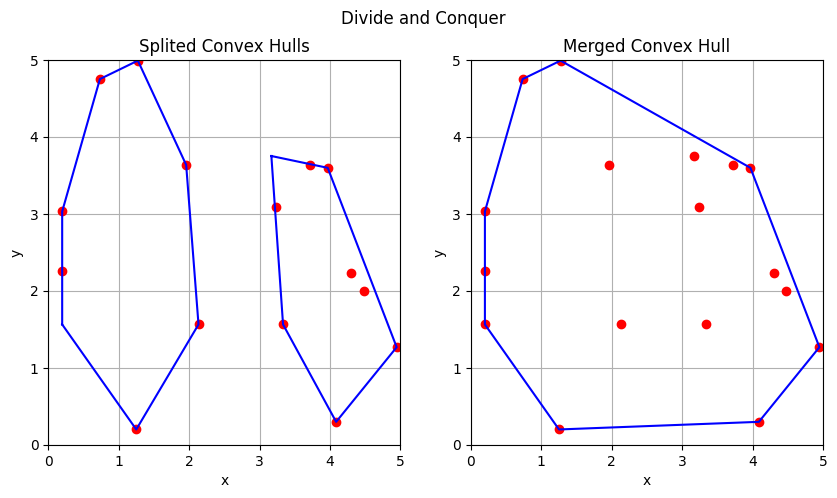

In [10]:
points = [(4.4761, 1.994), (4.9466, 1.2667), (0.1991, 3.0293), (1.2734, 4.9885), (1.9589, 3.6342), (3.7172, 3.6357),
              (4.0876, 0.2972), (4.304, 2.2281), (3.2383, 3.0908), (3.1682, 3.7495), (0.7345, 4.7487), (3.968, 3.5959),
              (1.2508, 0.1982), (0.1991, 2.256), (0.1991, 1.562), (2.134, 1.562), (3.334, 1.562)]

hull = divideAndConquer(points)

#### b) Aplicaciones de la envolvente convexa

- En robótica, la envolvente convexa se utiliza para calcular es espacio alcanzable por un robot manipulador, es decir, el conjunto de todas las posiciones que puede adoptar el efector final del robot. Donde los puntos representan las posibles posiciones y la envolvente convexa representa el límite de dicho espacio.
- En el control de epidemias se utiliza para calcular el área de riesgo de una enfermedad, donde los puntos representan los casos de la enfermedad y la envolvente convexa representa el área de riesgo.

### Punto 3

Se implementara la estructura de arbol binario ya que es requerida por el la linea de barrido.

In [11]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

def insertBST(root, node):
  if (node.data < root.data):
    if root.left is None:
      root.left = node
    else:
      insertBST(root.left, node)
  else:
    if root.right is None:
      root.right = node
    else:
      insertBST(root.right, node)

def inOrder(node):
  inorderArr = []

  if node.left is not None:
    leftInorderArr = inOrder(node.left)
    inorderArr.extend(leftInorderArr)

  inorderArr.append(node.data)

  if node.right is not None:
    rightInorderArr = inOrder(node.right)
    inorderArr.extend(rightInorderArr)
  return inorderArr



Se crean las clases Punto, Segmento y Linea de barrido. Donde las 2 primeras sobrecargan operadores para crear las reglas de ordenamiento nesesarias para el algoritmo.

Luego la linea de barrido contiene herramientas para plotting y los metodos propios del algoritmo.

In [17]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __lt__(self, p) -> bool:
        return (self.y > p.y) or (self.y == p.y and self.x < p.x)

    def __gt__(self, p) -> bool:
        return not self.__lt__(p)

    def __eq__(self, p) -> bool:
        return self.x == p.x and self.y == p.y

    def __str__(self):
        return f"P({self.x}, {self.y})"

    def __repr__(self):
        return f"P({self.x}, {self.y})"

    def toTuple(self):
        return (self.x, self.y)


class Segment:
    def __init__(self, start: Point, end: Point, label=None):
        self.label = label
        self.ysl = None
        if start > end:
            start, end = end, start
        self.start = start
        self.end = end

    def toCoords(self):
        return [[self.start.x, self.end.x], [self.start.y, self.end.y]]

    def add2plot(self, color='', plter=plt):
        plter.plot([self.start.x, self.end.x], [
            self.start.y, self.end.y], f'{color}-', label=self.label)

    def sp_intersection_point(self, y):
        if self.start.y == self.end.y:
            return self.start
        alpha = (y - self.end.y) / (self.start.y - self.end.y)
        x = alpha * self.start.x + (1 - alpha) * self.end.x
        return Point(round(x, 5), round(y, 5))

    def __lt__(self, s):
        if any([self.ysl is None, s.ysl is None, self.ysl != s.ysl]):
            raise ValueError('Not comparing segments with the same y')
        return self.sp_intersection_point(self.ysl) < s.sp_intersection_point(self.ysl)

    def __gt__(self, s):
        return not self.__lt__(s)

    def __eq__(self, s):
        return self.start == s.start and self.end == s.end

    def __iter__(self):
        return iter([self.start, self.end])

    def __repr__(self):
        return f'S({self.start} - {self.end})'

    def __str__(self):
        return f'S({self.start} - {self.end})'


class SweepLine:
    def __init__(self, S):
        self.S = S # list of segments
        self.T = None # binary search tree
        self.U = [] # Segments that contains p as a upper endpoint
        self.L = [] # Segments that contains p as a lower endpoint
        self.C = [] # Segments that contains p as a inner point
        self.Q = [] # Event queue
        self.I = [] # Intersection points
        self.y = None # Sweep line height
        self.TaoSortArr = [] # Array of segments sorted by sweep line height

        self.warned = False

    # Plotter Functions
    def plotState(self, plot=True):
        if not plot:
            return
        if len(self.S) > 5:
            if not self.warned:
                print("Too many segments to plot")
            self.warned = True
            return
        if self.y is None:
            return
        maxxs = max([i.start.x for i in self.S] + [i.end.x for i in self.S])
        minxs = min([i.start.x for i in self.S] + [i.end.x for i in self.S])
        plt.plot([minxs, maxxs], [self.y, self.y], 'k--', label="Sweep line")
        for i in self.S:
            if i.start.y >= self.y >= i.end.y:
                i.add2plot('b')
            else:
                # plot in gray
                i.add2plot('k')
        plt.grid()
        plt.show()

    # sweep line functions utilities
    def updateQSP(self):
        # Updates all sweep line height in Q segments
        for i in self.Q:
            i[1].ysl = self.y

    def updateTreeArrSP(self):
        # Updates all sweep line height in tree segments
        for i in self.TaoSortArr:
            i.ysl = self.y

    def updateSP(self):
        # Updates all sweep line height in Q and tree segments
        self.y -= 0.01
        self.updateQSP()
        self.updateTreeArrSP()

    # Algorithm functions
    def findNewEvent(self, sl, sr, p):

        intersection = cross(sl.start.toTuple(), sl.end.toTuple(), sr.start.toTuple(), sr.end.toTuple())
        if not intersection[0]:
            return
        intersection = intersection[1]
        intersection_point = Point(intersection[0], intersection[1])
        if p[0] < intersection_point != p[0] and intersection_point not in [i[0] for i in self.Q]:
            self.Q.append((intersection_point, sl, 'c'))
            self.Q.sort(key=lambda x: x[0])


    def handleEventPoint(self, p):

        self.U = [i[1] for i in self.Q if i[2] == 'u' and i[0] == p[0]]
        self.L = [i[1] for i in self.Q if i[2] == 'l' and i[0] == p[0]]

        if p[2] == 'u':
            self.U.append(p[1])
        elif p[2] == 'l':
            self.L.append(p[1])

        self.TaoSortArr = inOrder(self.T)

        self.C = [i for i in self.TaoSortArr if (i.sp_intersection_point(p[0].y) == p[0] or abs(
            p[0].x - i.sp_intersection_point(p[0].y).x) < 0.1) and i not in self.L and i not in self.U]

        if p[2] == 'c' and p[1] not in self.C:
            self.C.append(p[1])

        if len(self.L + self.U + self.C) > 1:
            self.I.append([p, self.L, self.U, self.C])

        for i in self.L + self.C:
            if i in self.TaoSortArr:
                self.TaoSortArr.remove(i)

        for i in self.U + self.C:
            if i not in self.TaoSortArr:
                self.TaoSortArr.append(i)

        self.updateSP()

        if (not self.TaoSortArr and not self.Q) or not self.TaoSortArr:
            return

        root = self.TaoSortArr.pop(0)
        self.T = Node(root)

        for i in self.TaoSortArr:
            insertBST(self.T, Node(i))

        self.TaoSortArr = inOrder(self.T)

        if len(self.TaoSortArr) > 1:
            if len(self.U + self.C) == 0:
                indx = 0
                xs = [p[0].x]
                for i in self.TaoSortArr:
                    xs.append(i.sp_intersection_point(self.y).x)

                while max(xs) != p[0].x and self.TaoSortArr[indx].sp_intersection_point(self.y).x < p[0].x:
                    indx += 1
                sr = self.TaoSortArr[indx]
                sl = self.TaoSortArr[indx - 1]
                self.findNewEvent(sl, sr, p)
            else:
                U_C = self.U + self.C
                indx = 0
                sp = sp = spp = sl = sr = None
                while 1:
                    if self.TaoSortArr[indx] in U_C:
                        s_prime = self.TaoSortArr[indx]
                        if indx == 0:
                            break
                        sl = self.TaoSortArr[indx - 1]
                        break
                    indx += 1
                if indx != 0:
                    self.findNewEvent(sl, s_prime, p)
                indx = -1

                while 1:
                    if self.TaoSortArr[indx] in U_C:
                        s_prime_prime = self.TaoSortArr[indx]
                        if indx == -1:
                            break
                        sr = self.TaoSortArr[indx + 1]
                        break
                    indx -= 1
                if indx != -1:
                    self.findNewEvent(s_prime_prime, sr, p)

        pass

    def findIntersections(self, plot=True):
        Q_U = [(i.start, i, 'u') for i in self.S]
        Q_L = [(i.end, i, 'l') for i in self.S]
        self.Q.extend(Q_U + Q_L)
        self.Q.sort(key=lambda x: x[0])
        self.T = Node(self.Q[0][1])

        while self.Q:
            self.plotState(plot)
            self.y = self.Q[0][0].y
            self.updateSP()

            p = self.Q.pop(0)
            self.handleEventPoint(p)

        return self.I


def segmentGenerator(n, limit, type=1, rounded=2):
    if type:
        return [
            Segment(
                *[Point(*[round(uniform(-limit,limit), rounded) for _ in range(2)]) for _ in range(2)]
            )
            for _ in range(n)
        ]
    return [
        Segment(
            *[Point(*[round(randint(-limit, limit), rounded) for _ in range(2)]) for _ in range(2)]
        )
        for _ in range(n)
    ]

Se generarán 20 segmentos aleatorios con puntos entre -50 y 50, se pueden cambiar los parámetros de la función `segmentGenerator` para generar segmentos con puntos enteros o decimales. (0 para enteros, 1 para decimales).

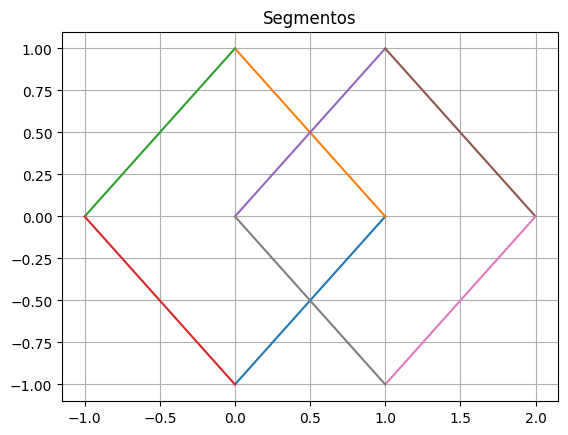

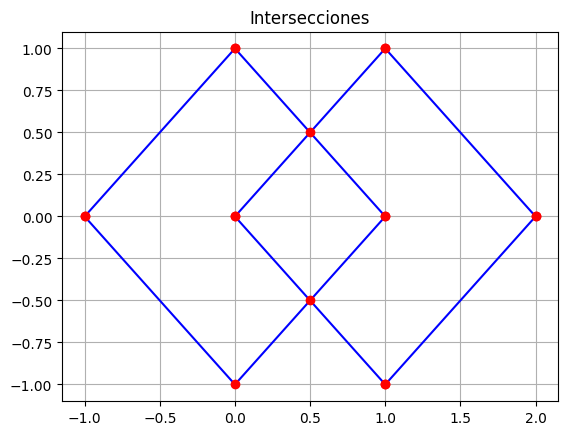

Intersecciones encontradas: 17
P(0, 1)
P(0, 1)
P(1, 1)
P(1, 1)
P(0.5, 0.5)
P(-1, 0)
P(-1, 0)
P(0, 0)
P(0, 0)
P(1, 0)
P(1, 0)
P(2, 0)
P(2, 0)
P(0.5, -0.5)
P(0, -1)
P(1, -1)
P(1, -1)


In [19]:
#S = segmentGenerator(20, 50, type=1)
S = [Segment(Point(0,-1), Point(1,0)),Segment(Point(1,0), Point(0,1)),Segment(Point(0,1), Point(-1,0)),Segment(Point(-1,0), Point(0,-1)),
Segment(Point(0,0), Point(1,1)),Segment(Point(1,1), Point(2,0)),Segment(Point(2,0), Point(1,-1)),Segment(Point(1,-1), Point(0,0))]
# S = [    Segment(Point(0,-2), Point(0,2)),     Segment(Point(-2,0), Point(2,0)),     Segment(Point(-1,-1), Point(1,1)),     Segment(Point(-1,1), Point(1,-1)),     Segment(Point(-1,0), Point(1,0)),     Segment(Point(0,-1), Point(0,1)),     Segment(Point(-2,2), Point(2,-2)),     Segment(Point(-2,-2), Point(2,2))]

for i in S:
    i.add2plot()

plt.title("Segmentos")
plt.grid(1)
plt.show()

s = SweepLine(S)
# Si se quieren ver los estados de la linea de barrido cambiar el 0 por 1, recuerde que esta limitado a 5 segmentos.
I = s.findIntersections(plot=0)
intersectionPoints = [i[0][0] for i in I]
for i in S:
    i.add2plot('b')
for i in intersectionPoints:
    plt.plot(i.x, i.y, 'ro')

plt.title("Intersecciones")
plt.grid(1)
plt.show()
print(f"Intersecciones encontradas: {len(I)}")
for i in I:
    pprint.pprint(i[0][0])

## Referencias
- Singh, A. (2018, mayo 23). Convex Hull using Divide and Conquer Algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/convex-hull-using-divide-and-conquer-algorithm/
- OpenGenus IQ. (2020, May 10). Divide and Conquer Convex Hull. OpenGenus IQ. https://iq.opengenus.org/divide-and-conquer-convex-hull/#:~:text=The%20key%20idea%20is%20that,results%20to%20a%20complete%20solution.
- Dumonteil, E., Majumdar, S. N., Rosso, A., & Zoia, A. (2013). Spatial extent of an outbreak in animal epidemics. Proceedings of the National Academy of Sciences, 110(11), 4239-4244. https://doi.org/10.1073/pnas.121323711
- de Berg, M., Cheong, O., van Kreveld, M., & Overmars, M. (2008). Computational geometry: Algorithms and applications (3rd ed.). Springer-Verlag.